In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import collections  as mc
import numpy as np
import plotly.express as px

#import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
    
import matplotlib.pyplot as plt

import warnings
import string

import plotly.graph_objects as go
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

warnings.filterwarnings('ignore')

%matplotlib inline

# Exploring the metro employee data

#### Import the data

In [2]:
metro_df = pd.read_csv('General_Government_Employees_Demographics.csv')

#### Examine the first 5 rows and the last five rows of the metro employee data.

In [3]:
metro_df.head(5)

Pay Grade / Step  Annual Salary  Class                      Title  \
0             OR13      160452.89  10947  Assoc Admin-Police & Fire   
1             PF04       56478.93   7356           Police Officer 2   
2             CO02       40542.65   6982     Correctional Officer 1   
3            PF10B       87957.57   7355          Police Lieutenant   
4            PF08B       87073.74   7366            Police Sergeant   

  Current Department Employment Status  EEO Job Category Description Gender  \
0             Police          Fulltime  Officials and administrators      M   
1             Police          Fulltime    Protective service workers      M   
2            Sheriff          Fulltime    Protective service workers      M   
3             Police          Fulltime                 Professionals      M   
4             Police          Fulltime                   Technicians      M   

     Ethnic Code Description  Year of Birth Date Started FLSA Exempt?  \
0                      White           1959   05/16/1992            Y   
1                      White           1989   07/16/2014            N   
2  Black or African American           1988   07/01/2019            N   
3                      White           1978   07/16/2002            N   
4  Black or African American           1975   01/16/2000            N   

     County  
0  Davidson  
1  Davidson  
2  Davidson  
3    Wilson  
4    Sumner

In [4]:
metro_df.tail(5)

Pay Grade / Step  Annual Salary  Class                       Title  \
9533               NS       45320.00  10762  Domestic Vio Victim Adv-MO   
9534               NS       10251.11   7279       Criminal Investigator   
9535             CO02       40542.65   6982      Correctional Officer 1   
9536             PF04       54818.21   7356            Police Officer 2   
9537            PF04B       54586.57   7356            Police Officer 2   

           Current Department Employment Status EEO Job Category Description  \
9533  Office of Family Safety          Fulltime                Professionals   
9534        District Attorney          Parttime   Protective service workers   
9535                  Sheriff          Fulltime   Protective service workers   
9536                   Police          Fulltime   Protective service workers   
9537                   Police          Fulltime   Protective service workers   

     Gender Ethnic Code Description  Year of Birth Date Started FLSA Exempt?  \
9533      F                   White           1985   04/24/2017            N   
9534      M                   White           1955   03/01/2017            N   
9535      M                   White           1998   07/01/2019            N   
9536      M                   White           1984   07/16/2015            N   
9537      F                   White           1995   10/16/2017            N   

          County  
9533    Davidson  
9534      Wilson  
9535  Montgomery  
9536      Sumner  
9537    Davidson

#### Check the data types of each column.

In [5]:
metro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pay Grade / Step              9537 non-null   object 
 1   Annual Salary                 9382 non-null   float64
 2   Class                         9538 non-null   int64  
 3   Title                         9538 non-null   object 
 4   Current Department            9538 non-null   object 
 5   Employment Status             9538 non-null   object 
 6   EEO Job Category Description  9533 non-null   object 
 7   Gender                        9538 non-null   object 
 8   Ethnic Code Description       9537 non-null   object 
 9   Year of Birth                 9538 non-null   int64  
 10  Date Started                  9538 non-null   object 
 11  FLSA Exempt?                  9516 non-null   object 
 12  County                        9538 non-null   object 
dtypes: 

#### Print the dimensions of the data.

In [6]:
metro_df.shape

(9538, 13)

# Formatting the data frame

In [7]:
metro_df.head()

Pay Grade / Step  Annual Salary  Class                      Title  \
0             OR13      160452.89  10947  Assoc Admin-Police & Fire   
1             PF04       56478.93   7356           Police Officer 2   
2             CO02       40542.65   6982     Correctional Officer 1   
3            PF10B       87957.57   7355          Police Lieutenant   
4            PF08B       87073.74   7366            Police Sergeant   

  Current Department Employment Status  EEO Job Category Description Gender  \
0             Police          Fulltime  Officials and administrators      M   
1             Police          Fulltime    Protective service workers      M   
2            Sheriff          Fulltime    Protective service workers      M   
3             Police          Fulltime                 Professionals      M   
4             Police          Fulltime                   Technicians      M   

     Ethnic Code Description  Year of Birth Date Started FLSA Exempt?  \
0                      White           1959   05/16/1992            Y   
1                      White           1989   07/16/2014            N   
2  Black or African American           1988   07/01/2019            N   
3                      White           1978   07/16/2002            N   
4  Black or African American           1975   01/16/2000            N   

     County  
0  Davidson  
1  Davidson  
2  Davidson  
3    Wilson  
4    Sumner

#### Keep only the columns we want

In [8]:
metro_df1 = metro_df[['Annual Salary', 'Title', 'Current Department', 'Gender', 'Ethnic Code Description', 'Year of Birth', 'Date Started', 'County']]

#### Rename some of these columns

In [9]:
metro_df1.columns = ['Salary', 'Title', 'Dept', 'Gender', 'Ethnicity', 'Birth Year', 'StartDate', 'County']
metro_df1.head()

Salary                      Title     Dept Gender  \
0  160452.89  Assoc Admin-Police & Fire   Police      M   
1   56478.93           Police Officer 2   Police      M   
2   40542.65     Correctional Officer 1  Sheriff      M   
3   87957.57          Police Lieutenant   Police      M   
4   87073.74            Police Sergeant   Police      M   

                   Ethnicity  Birth Year   StartDate    County  
0                      White        1959  05/16/1992  Davidson  
1                      White        1989  07/16/2014  Davidson  
2  Black or African American        1988  07/01/2019  Davidson  
3                      White        1978  07/16/2002    Wilson  
4  Black or African American        1975  01/16/2000    Sumner

### Create a tenure column using the start date


#### Keep only the year of the start date, as an integer

In [10]:
metro_df1.StartDate = metro_df1.StartDate.str[-4:]

In [11]:
metro_df1.head(5)
metro_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Salary      9382 non-null   float64
 1   Title       9538 non-null   object 
 2   Dept        9538 non-null   object 
 3   Gender      9538 non-null   object 
 4   Ethnicity   9537 non-null   object 
 5   Birth Year  9538 non-null   int64  
 6   StartDate   9538 non-null   object 
 7   County      9538 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 596.2+ KB


In [12]:
metro_df1.StartDate = metro_df1.StartDate.astype(int)
metro_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Salary      9382 non-null   float64
 1   Title       9538 non-null   object 
 2   Dept        9538 non-null   object 
 3   Gender      9538 non-null   object 
 4   Ethnicity   9537 non-null   object 
 5   Birth Year  9538 non-null   int64  
 6   StartDate   9538 non-null   int64  
 7   County      9538 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 596.2+ KB


#### Create Age from Birth Year & Tenure from Start Date

- Begin the for-loop to iterate through `metro_df1` 
    - Store the row's birth year in a variable called `birth`.
    - Store each row's `age` in a variable called `age`.
    - `append` `age` to `metro_df1`.

In [13]:
age = []
tenure = []
for row in metro_df1.iterrows():
    vals = row[1]
    birth = vals['Birth Year']
    start = vals['StartDate']
    age.append(2020 - birth)
    tenure.append(2020 - start)

Assign `age` to a new column in `metro_df1` called `Age`.

In [14]:
metro_df1['Age'] = age
metro_df1['Tenure'] = tenure
metro_df1.head()

Salary                      Title     Dept Gender  \
0  160452.89  Assoc Admin-Police & Fire   Police      M   
1   56478.93           Police Officer 2   Police      M   
2   40542.65     Correctional Officer 1  Sheriff      M   
3   87957.57          Police Lieutenant   Police      M   
4   87073.74            Police Sergeant   Police      M   

                   Ethnicity  Birth Year  StartDate    County  Age  Tenure  
0                      White        1959       1992  Davidson   61      28  
1                      White        1989       2014  Davidson   31       6  
2  Black or African American        1988       2019  Davidson   32       1  
3                      White        1978       2002    Wilson   42      18  
4  Black or African American        1975       2000    Sumner   45      20

#### Make a dict for Ethnicity so it's just easier to read

In [15]:
metro_df1.Ethnicity.unique()

array(['White', 'Black or African American',
       'Hispanic or Latino of any race', 'Two or More Races', 'Asian',
       'American Indian or Alaskan Native',
       'Native Hawaiian or Other Pacific', nan], dtype=object)

In [16]:
race_dict = dict([('Black or African American','Black'), 
                    ('Hispanic or Latino of any race','Hispanic/Latino'),
                    ('Two or More Races','Multiple'), 
                    ('American Indian or Alaskan Native','Native American'), 
                    ('Native Hawaiian or Other Pacific','Pacific Islander'), 
                    ('nan','Unknown')])

In [17]:
metro_df2 = metro_df1.copy()

In [18]:
metro_df2 = metro_df2.replace({"Ethnicity": race_dict})

In [19]:
metro_df2.Ethnicity.unique()

array(['White', 'Black', 'Hispanic/Latino', 'Multiple', 'Asian',
       'Native American', 'Pacific Islander', nan], dtype=object)

In [20]:
metro_df2.Ethnicity.fillna(value = 'Unreported', inplace = True)
metro_df2.Ethnicity.unique()

array(['White', 'Black', 'Hispanic/Latino', 'Multiple', 'Asian',
       'Native American', 'Pacific Islander', 'Unreported'], dtype=object)

#### Create an intersxnl term for race x gender, & new job title with dept


In [37]:
inter = []
newtitle = []
for row in metro_df2.iterrows():
    vals = row[1]
    race = vals['Ethnicity']
    gen = vals['Gender']
    title = vals['Title']
    dept = vals['Dept']
    inter.append(race + gen)
    newtitle.append(title + dept)

In [38]:
metro_df2['InterSn'] = inter
metro_df2['NewTitle'] = newtitle
metro_df2.head(7)

Salary                      Title     Dept Gender Ethnicity  Birth Year  \
0  160452.89  Assoc Admin-Police & Fire   Police      M     White        1959   
1   56478.93           Police Officer 2   Police      M     White        1989   
2   40542.65     Correctional Officer 1  Sheriff      M     Black        1988   
3   87957.57          Police Lieutenant   Police      M     White        1978   
4   87073.74            Police Sergeant   Police      M     Black        1975   
5   85226.12               Fire Captain     Fire      M     White        1973   
6   82743.81               Fire Captain     Fire      M     White        1971   

   StartDate      County  Age  Tenure InterSn                         NewTitle  
0       1992    Davidson   61      28  WhiteM  Assoc Admin-Police & FirePolice  
1       2014    Davidson   31       6  WhiteM           Police Officer 2Police  
2       2019    Davidson   32       1  BlackM    Correctional Officer 1Sheriff  
3       2002      Wilson   42      18  WhiteM          Police LieutenantPolice  
4       2000      Sumner   45      20  BlackM            Police SergeantPolice  
5       1997  Williamson   47      23  WhiteM                 Fire CaptainFire  
6       1995    Davidson   49      25  WhiteM                 Fire CaptainFire

# Investigating our specific questions about the data

## Salary & Tenure by Gender and Ethnicity

### Question: Is there a significant difference in salary between people of diff gender?

#### Examining salary by gender for metro employees overall

In [23]:
# Recoding value from numeric to string
metro_df2['Gender'].replace({1: 'M', 2: 'F'}, inplace= True)
    
# Gettin summary statistics
rp.summary_cont(metro_df2['Salary'])

Variable       N          Mean            SD          SE     95% Conf.  \
0   Salary  9382.0  56091.103489  24059.913329  248.396999  55604.191494   

       Interval  
0  56578.015483

In [24]:
#getting summary info on the Salary by gender and ethnicity
rp.summary_cont(metro_df2['Salary'].groupby(metro_df2['Gender']))
rp.summary_cont(metro_df2['Salary'].groupby(metro_df2['Ethnicity']))

N           Mean            SD           SE  \
Ethnicity                                                          
Asian               91   57297.809121  22517.737610  2360.500289   
Black             2602   48201.675834  22780.411841   446.588901   
Hispanic/Latino    255   50526.105137  18844.614340  1180.095526   
Multiple           183   58543.921913  17577.868209  1299.393408   
Native American     22   57014.082273  15700.189743  3347.291700   
Pacific Islander     3   67591.796667   3462.375167  1999.003234   
Unreported           1  106456.000000           NaN          NaN   
White             6225   59510.142339  24172.048881   306.368271   

                     95% Conf.      Interval  
Ethnicity                                     
Asian             52645.596332  61950.021910  
Black             47326.193340  49077.158328  
Hispanic/Latino   48208.569255  52843.641019  
Multiple          55990.123684  61097.720141  
Native American   50299.000200  63729.164345  
Pacific Islander  62793.189506  72390.403827  
Unreported                 NaN           NaN  
White             58909.612290  60110.672388

In [25]:
#creating an ordinary least squares regression model with fitting for overall statistics
results_gender = ols('Salary ~ C(Gender)', data=metro_df2).fit()
results_gender.summary()
results_ethnicity = ols('Salary ~ C(Ethnicity)', data = metro_df2).fit()
results_ethnicity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     63.76
Date:                Sun, 03 May 2020   Prob (F-statistic):           4.20e-90
Time:                        14:12:08   Log-Likelihood:            -1.0774e+05
No. Observations:                9382   AIC:                         2.155e+05
Df Residuals:                    9374   BIC:                         2.156e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          5.73e+04   2465.103     23.244      0.000    5.25e+04    6.21e+04
C(Ethnicity)[T.Black]            -9096.1333   2507.839     -3.627      0.000    -1.4e+04   -4180.225
C(Ethnicity)[T.Hispanic/Latino]  -6771.7040   2871.462     -2.358      0.018   -1.24e+04   -1143.016
C(Ethnicity)[T.Multiple]          1246.1128   3016.371      0.413      0.680   -4666.630    7158.855
C(Ethnicity)[T.Native American]   -283.7268   5586.798     -0.051      0.959   -1.12e+04    1.07e+04
C(Ethnicity)[T.Pacific Islander]  1.029e+04   1.38e+04      0.746      0.456   -1.68e+04    3.73e+04
C(Ethnicity)[T.Unreported]        4.916e+04   2.36e+04      2.079      0.038    2809.962    9.55e+04
C(Ethnicity)[T.White]             2212.3332   2483.056      0.891      0.373   -2654.995    7079.661
==============================================================================
Omnibus:                     3330.692   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23096.879
Skew:                           1.530   Prob(JB):                         0.00
Kurtosis:                      10.051   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#running a type 2 ANOVA on our OLS models for salary by gender or ethnicity
aov_table_g = sm.stats.anova_lm(results_gender, typ=2)
print(aov_table_g)
aov_table_e = sm.stats.anova_lm(results_ethnicity, typ=2)
print(aov_table_e)

                 sum_sq      df           F        PR(>F)
C(Gender)  1.184096e+11     1.0  209.087026  6.925672e-47
Residual   5.312058e+12  9380.0         NaN           NaN
                    sum_sq      df          F        PR(>F)
C(Ethnicity)  2.468084e+11     7.0  63.760315  4.203875e-90
Residual      5.183659e+12  9374.0        NaN           NaN


In [42]:
#gender came out as significant so we're going to plot the salaries
y1 = metro_df2.query('Gender=="M"').Salary
y2 = metro_df2.query('Gender=="F"').Salary

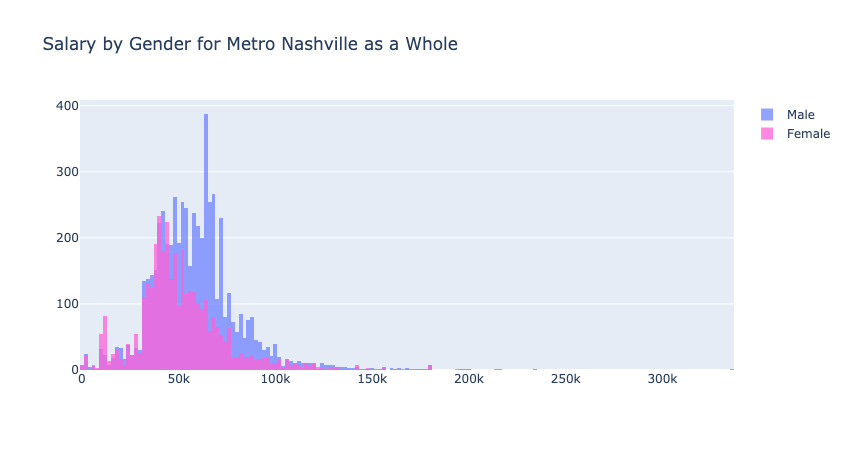

In [43]:
#add a trace for male and female, overlay the histograms with some transparency
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = y1,
    name='Male',
    marker_color='#6e83ff'
))
fig.add_trace(go.Histogram(
    x=y2,
    name='Female',
    marker_color='#ff61d7'
))
fig.update_layout(barmode='overlay',
    title_text="Salary by Gender for Metro Nashville as a Whole")
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("GenderWageGap_Overall.pdf")

In [29]:
#running a two-sided mann-whitney-u on salary by gender for all of metro
#then doing a post hoc test with a bonferroni correction for multiple comparisons
results_gender = stats.mannwhitneyu(metro_df2.query('Gender == "M"').Salary, metro_df2.query('Gender == "F"').Salary, use_continuity=True, alternative='two-sided')
results_g_adj = sp.posthoc_mannwhitney(metro_df2, val_col = 'Salary', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
print(results_g_adj, "\n")

# getting the median salaries and then taking the difference, 
#    for a ballpark on how much more metro gives to men than women each year
metro_df2.query('Gender == "M"').Salary.median() #57475.62
metro_df2.query('Gender =="F"').Salary.median() #47299.59
#57475.62 - 47299.59 = $10,176.03

              F             M
F -1.000000e+00  4.926355e-68
M  4.926355e-68 -1.000000e+00 



47299.59

#### Examining salary by gender for each department

In [50]:
depts1 = metro_df2.groupby('Dept')
#depts.describe() 
for dept in metro_df2.Dept.unique():
    if depts1.get_group(dept).Salary.count() >= 3:
        if any(depts1.get_group(dept).Gender == 'M') & any(depts1.get_group(dept).Gender == 'F'):
            k1 = depts1.get_group(dept).query('Gender == "M"').Salary
            k2 = depts1.get_group(dept).query('Gender == "F"').Salary
            if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                results_gender = stats.mannwhitneyu(depts1.get_group(dept).query('Gender == "M"').Salary, depts1.get_group(dept).query('Gender == "F"').Salary, use_continuity=True, alternative='two-sided')
                results_g_adj = sp.posthoc_mannwhitney(depts1.get_group(dept), val_col = 'Salary', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
                if results_gender.pvalue < 0.05:
                    print(dept)#, results_g_adj, "\n")


Police
Sheriff
Fire
Public Defender
Parks
Juvenile Court
Finance
Law
General Services
Public Works
Codes Administration
Juvenile Court Clerk


In [51]:
#Write down the Titles that need to be investigated . . . 
    #see if they're in the same department. 
    #Then examine the data in a box plot
gender_discdept = ['Police',
    'Sheriff',
    'Fire',
    'Public Defender',
    'Parks',
    'Juvenile Court',
    'Finance',
    'Law',
    'General Services',
    'Public Works',
    'Codes Administration',
    'Juvenile Court Clerk']
metro_df2_gd = metro_df2[metro_df2.Dept.isin(gender_discdept)]

In [52]:
#setting up variables for boxplot examining salary by gender for each job title
y1 = metro_df2_gd.query('Gender=="M"').Salary
y2 = metro_df2_gd.query('Gender=="F"').Salary
x1 = metro_df2_gd.query('Gender=="M"').Dept
x2 = metro_df2_gd.query('Gender=="F"').Dept
x1

0        Police
1        Police
2       Sheriff
3        Police
4        Police
         ...   
9527       Fire
9528     Police
9532      Parks
9535    Sheriff
9536     Police
Name: Dept, Length: 4222, dtype: object

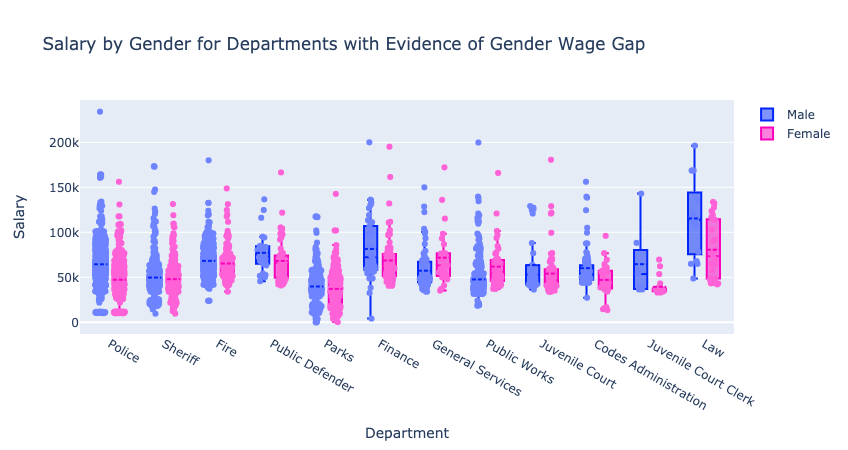

In [53]:
#add traces for male and female, group the different boxes by traces for job title
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Salary',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Salary by Gender for Departments with Evidence of Gender Wage Gap",
    xaxis_title='Department'
)
fig.show()
fig.write_image("GenderWageGap_Departments.pdf")

#### Examining salary by gender for each job title

In [30]:
depts = metro_df2.groupby('NewTitle')
#depts.describe() 
for title in metro_df2.NewTitle.unique():
    if depts.get_group(title).Salary.count() >= 3:
        if any(depts.get_group(title).Gender == 'M') & any(depts.get_group(title).Gender == 'F'):
            k1 = depts.get_group(title).query('Gender == "M"').Salary
            k2 = depts.get_group(title).query('Gender == "F"').Salary
            if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                results_gender = stats.mannwhitneyu(depts.get_group(title).query('Gender == "M"').Salary, depts.get_group(title).query('Gender == "F"').Salary, use_continuity=True, alternative='two-sided')
                results_g_adj = sp.posthoc_mannwhitney(depts.get_group(title), val_col = 'Salary', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
                if results_gender.pvalue < 0.05:
                    print(title, results_g_adj, "\n")


Police Officer 2Police           F         M
F -1.000000  0.002369
M  0.002369 -1.000000 

Emer Telecommunications Off 4Emergency Communications           F         M
F -1.000000  0.030664
M  0.030664 -1.000000 

Public Health Nurse 1Health           F         M
F -1.000000  0.037101
M  0.037101 -1.000000 

Program Spec 2Health           F         M
F -1.000000  0.020803
M  0.020803 -1.000000 

Assistant Public Defender 2Public Defender           F         M
F -1.000000  0.029387
M  0.029387 -1.000000 

Fire Fighter/ParamedicFire           F         M
F -1.000000  0.012648
M  0.012648 -1.000000 

Correctional Officer 2Sheriff          F        M
F -1.00000  0.00323
M  0.00323 -1.00000 

Security Officer 1Sheriff           F         M
F -1.000000  0.005722
M  0.005722 -1.000000 

Seasonal/Part-time/TemporaryHealth           F         M
F -1.000000  0.014996
M  0.014996 -1.000000 

Judicial Asst 2State Trial Courts           F         M
F -1.000000  0.024418
M  0.024418 -1.000000 

Inmat

In [31]:
#Write down the Titles that need to be investigated . . . 
    #see if they're in the same department. 
    #Then examine the data in a box plot
gender_disc = ['Police Officer 2Police', 'Emer Telecommunications Off 4Emergency Communications',
               'Public Health Nurse 1Health', 'Program Spec 2Health', 
               'Assistant Public Defender 2Public Defender', 'Fire Fighter/ParamedicFire',
                'Correctional Officer 2Sheriff', 'Security Officer 1Sheriff', 
               'Seasonal/Part-time/TemporaryHealth', 'Judicial Asst 2State Trial Courts',
                'Inmate Prop Clerk-DCSOSheriff', 'Procurement Officer 2Finance']
metro_df2_g = metro_df2[metro_df2.NewTitle.isin(gender_disc)]

In [32]:
#setting up variables for boxplot examining salary by gender for each job title
y1 = metro_df2_g.query('Gender=="M"').Salary
y2 = metro_df2_g.query('Gender=="F"').Salary
x1 = metro_df2_g.query('Gender=="M"').NewTitle
x2 = metro_df2_g.query('Gender=="F"').NewTitle
x1

1           Police Officer 2Police
8           Police Officer 2Police
22          Police Officer 2Police
32          Police Officer 2Police
52          Police Officer 2Police
                   ...            
9475    Fire Fighter/ParamedicFire
9498        Police Officer 2Police
9519        Police Officer 2Police
9521        Police Officer 2Police
9536        Police Officer 2Police
Name: NewTitle, Length: 1097, dtype: object

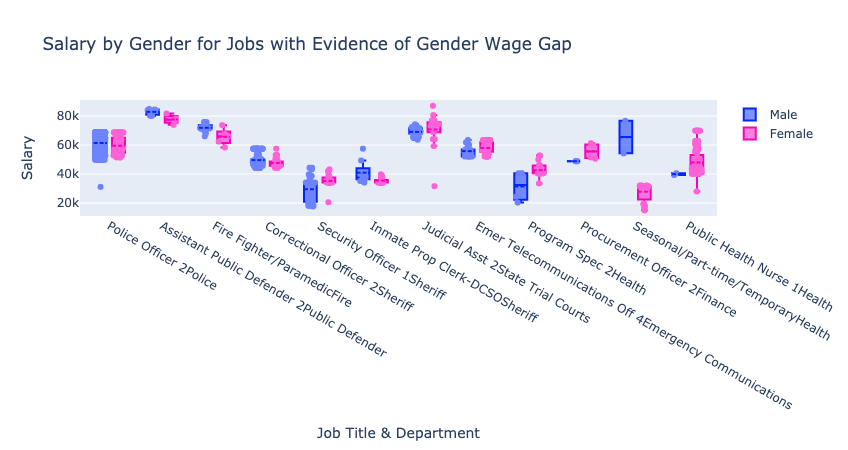

In [33]:
#add traces for male and female, group the different boxes by traces for job title
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Salary',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Salary by Gender for Jobs with Evidence of Gender Wage Gap",
    xaxis_title='Job Title & Department'
)
fig.show()
fig.write_image("GenderWageGap.pdf")

#### For Salary by Gender - These are the significant differences:
    Police Officer 2Police
    Emer Telecommunications Off 4Emergency Communications 
    Public Health Nurse 1Health
    Program Spec 2Health 
    Assistant Public Defender 2Public Defender
    Fire Fighter/ParamedicFire
    Correctional Officer 2Sheriff 
    Security Officer 1Sheriff
    Seasonal/Part-time/TemporaryHealth 
    Judicial Asst 2State Trial Courts
    Inmate Prop Clerk-DCSOSheriff 
    Procurement Officer 2Finance

### Question: Is there a significant difference in salary between people of diff ethnicity?

#### Examining salary by ethnicity for metro employees overall

In [34]:
#running a kruskal wallis test for salary by ethnicity, with a post hoc dunn_test and bonferroni correction
results_ethnicity = stats.kruskal(metro_df2.query('Ethnicity == "White"').Salary, metro_df2.query('Ethnicity == "Black"').Salary, metro_df2.query('Ethnicity == "Asian"').Salary, metro_df2.query('Ethnicity == "Native American"').Salary, metro_df2.query('Ethnicity == "Pacific Islander"').Salary, metro_df2.query('Ethnicity == "Multiple"').Salary, metro_df2.query('Ethnicity == "Unreported"').Salary, metro_df2.query('Ethnicity == "Hispanic/Latino"').Salary, nan_policy = 'omit')
phdunn_result = sp.posthoc_dunn(metro_df2, val_col = 'Salary', group_col = 'Ethnicity', p_adjust = 'bonferroni')
print(results_ethnicity) #KruskalResult(statistic=628.2993544613947, pvalue=1.9554776324791032e-131)
print(phdunn_result)

#Differences in median salaries between races that have significant differences in salary for all of metro
# Asian v Black 8.2259E-05 $14,154.08
# Asian v Hispanic/Latino 0.022857 $13,205.87
# Black v Multiple 1.061889E-13 $13,107.30
# Black v White 1.692541E-124 $12475.62
# Hispanic/Latino v Multiple 3.649720e-06 $12,159.09
# Hispanic/Latino v White 7.175164e-12 $11,527.41
metro_df2.query('Ethnicity == "Asian"').Salary.median() #59154.08
metro_df2.query('Ethnicity == "Black"').Salary.median() #45000.0
metro_df2.query('Ethnicity == "White"').Salary.median() #57475.62
metro_df2.query('Ethnicity == "Hispanic/Latino"').Salary.median() #45948.21
metro_df2.query('Ethnicity == "Multiple"').Salary.median() #58107.3

KruskalResult(statistic=628.2993544613947, pvalue=1.9554776324791032e-131)
                     Asian          Black  Hispanic/Latino      Multiple  \
Asian            -1.000000   8.225949e-05     2.285745e-02  1.000000e+00   
Black             0.000082  -1.000000e+00     1.000000e+00  1.061889e-13   
Hispanic/Latino   0.022857   1.000000e+00    -1.000000e+00  3.649720e-06   
Multiple          1.000000   1.061889e-13     3.649720e-06 -1.000000e+00   
Native American   1.000000   1.235149e-01     5.415701e-01  1.000000e+00   
Pacific Islander  1.000000   8.805234e-01     1.000000e+00  1.000000e+00   
Unreported        1.000000   1.000000e+00     1.000000e+00  1.000000e+00   
White             1.000000  1.692541e-124     7.175164e-12  1.000000e+00   

                  Native American  Pacific Islander  Unreported          White  
Asian                    1.000000          1.000000         1.0   1.000000e+00  
Black                    0.123515          0.880523         1.0  1.692541e-124

58107.3

In [44]:
#plotting these differences
x1 = metro_df2.query('Ethnicity == "White"').Salary
x2 = metro_df2.query('Ethnicity == "Black"').Salary
x3 = metro_df2.query('Ethnicity == "Hispanic/Latino"').Salary
x4 = metro_df2.query('Ethnicity == "Native American"').Salary
x5 = metro_df2.query('Ethnicity == "Pacific Islander"').Salary
x6 = metro_df2.query('Ethnicity == "Asian"').Salary
x7 = metro_df2.query('Ethnicity == "Multiple"').Salary
x8 = metro_df2.query('Ethnicity == "Unreported"').Salary


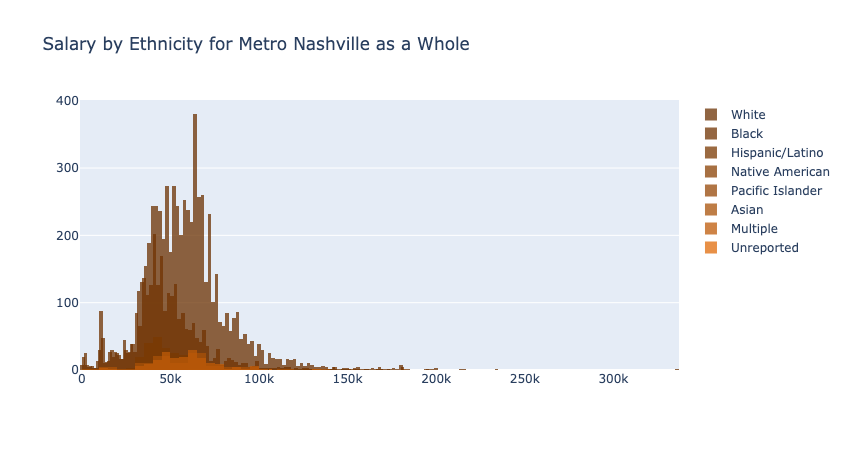

In [45]:
#comment out each race until you need to use it for a comparison
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = x1,
    name='White',
    marker_color='#6b3102'
))
fig.add_trace(go.Histogram(
    x=x2,
    name='Black',
    marker_color='#703301'
))
fig.add_trace(go.Histogram(
    x=x3,
    name='Hispanic/Latino',
    marker_color='#7a3801'
))
fig.add_trace(go.Histogram(
    x=x4,
    name='Native American',
    marker_color='#8a4003'
))
fig.add_trace(go.Histogram(
    x=x5,
    name='Pacific Islander',
    marker_color='#964706'
))
fig.add_trace(go.Histogram(
    x=x6,
    name='Asian',
    marker_color='#a85108'
))
fig.add_trace(go.Histogram(
    x=x7,
    name='Multiple',
    marker_color='#bd5a08'
))
fig.add_trace(go.Histogram(
    x=x8,
    name='Unreported',
    marker_color='#e06b09'
))
fig.update_layout(barmode='overlay',
    title_text="Salary by Ethnicity for Metro Nashville as a Whole")
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("EthnicityWageGap_Overall.pdf")

#### Now we want to look at Salary by Ethnicity for each department

In [54]:
#run a MWU or KW on the salaries by ethnicity for each job title
for dept in metro_df2.Dept.unique():
    if depts1.get_group(dept).Salary.count() >= 3:
        if depts1.get_group(dept).Ethnicity.nunique() >= 2:
            e_list = depts1.get_group(dept).Ethnicity.unique()
            #print(e_list[1])
            #print(title, depts.get_group(title).Ethnicity.nunique())
            k1 = depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary
            k2 = depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary
            if len(e_list) == 2:
                #print(title)
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.mannwhitneyu(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, use_continuity=True, alternative='two-sided')
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 3:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 4:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 5:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 6:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 7:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[6]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 8:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[6]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[7]').Salary, nan_policy = 'omit')
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")

            

Police KruskalResult(statistic=108.95430762024277, pvalue=3.37452107895539e-21) 

Sheriff KruskalResult(statistic=28.909281322589308, pvalue=2.4157363310259856e-05) 

Fire KruskalResult(statistic=15.649224742517049, pvalue=0.007920287943492825) 

Water Services KruskalResult(statistic=75.50517011968627, pvalue=7.297649265763665e-15) 

Public Defender KruskalResult(statistic=22.115057208524274, pvalue=0.00019012299388801327) 

Health KruskalResult(statistic=12.577437335320614, pvalue=0.013536156656782296) 

Parks KruskalResult(statistic=17.367288469285537, pvalue=0.008024088339763867) 

Public Library KruskalResult(statistic=17.836453315903096, pvalue=0.0031585146266299505) 

State Trial Courts KruskalResult(statistic=16.959669288558356, pvalue=0.0019681371932767913) 

Juvenile Court KruskalResult(statistic=13.215538124089642, pvalue=0.0013498402025156615) 

Criminal Court Clerk KruskalResult(statistic=10.495349557941287, pvalue=0.032861108930793026) 

Convention Center Authority Kruska

In [56]:
## Now I want to look at the raw data in box plots for those specific departments with evidence of ethnicity-based wage gap
#Titles where there's a ethnicity gap in salary:
racewage_gapdept = ['Police',
'Sheriff ',
'Fire',
'Water Services',
'Public Defender',
'Health',
'Parks ',
'Public Library ',
'State Trial Courts ',
'Juvenile Court',
'Criminal Court Clerk',
'Convention Center Authority ',
'County Clerk']
metro_df2_ed = metro_df2[metro_df2.Dept.isin(racewage_gapdept)]
##plot tenure gender gaps and make sure they are in the same direction as the salary difference
#update - they do all go in the same direction as the salary difference
y1 = metro_df2_ed.query('Ethnicity=="White"').Salary
y2 = metro_df2_ed.query('Ethnicity=="Black"').Salary
y3 = metro_df2_ed.query('Ethnicity=="Hispanic/Latino"').Salary
y4 = metro_df2_ed.query('Ethnicity=="Asian"').Salary
y5 = metro_df2_ed.query('Ethnicity=="Native American"').Salary
y6 = metro_df2_ed.query('Ethnicity=="Pacific Islander"').Salary
y7 = metro_df2_ed.query('Ethnicity=="Multiple"').Salary
y8 = metro_df2_ed.query('Ethnicity=="Unreported"').Salary
x1 = metro_df2_ed.query('Ethnicity=="White"').Dept
x2 = metro_df2_ed.query('Ethnicity=="Black"').Dept
x3 = metro_df2_ed.query('Ethnicity=="Hispanic/Latino"').Dept
x4 = metro_df2_ed.query('Ethnicity=="Asian"').Dept
x5 = metro_df2_ed.query('Ethnicity=="Native American"').Dept
x6 = metro_df2_ed.query('Ethnicity=="Pacific Islander"').Dept
x7 = metro_df2_ed.query('Ethnicity=="Multiple"').Dept
x8 = metro_df2_ed.query('Ethnicity=="Unreported"').Dept
x1

0       Police
1       Police
3       Police
5         Fire
6         Fire
         ...  
9527      Fire
9529      Fire
9530      Fire
9536    Police
9537    Police
Name: Dept, Length: 3424, dtype: object

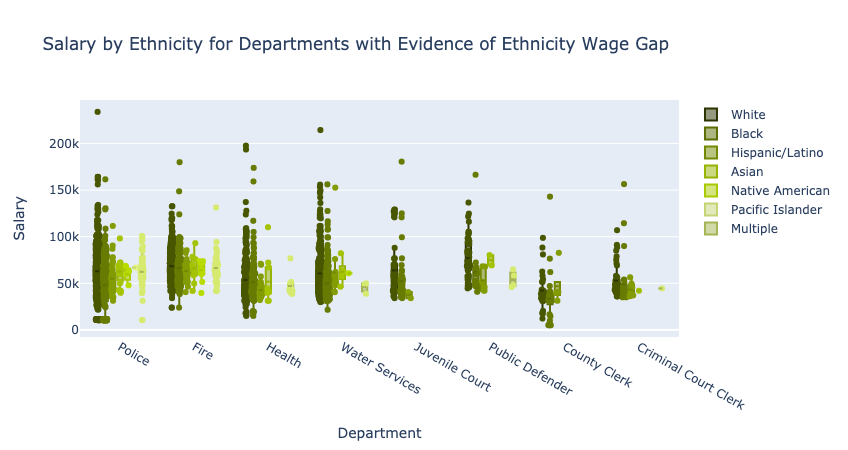

In [57]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='White',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#485600',
    line_color='#2b3300'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Black',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#677a02',
    line_color='#5c6d01'

))
fig.add_trace(go.Box(
    y=y3,
    x=x3,
    name='Hispanic/Latino',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#849c03',
    line_color='#748902'

))
fig.add_trace(go.Box(
    y=y4,
    x=x4,
    name='Asian',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#a4c304',
    line_color='#96b202'

))
fig.add_trace(go.Box(
    y=y5,
    x=x5,
    name='Native American',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#b8db00',
    line_color='#a9c900'

))
fig.add_trace(go.Box(
    y=y6,
    x=x6,
    name='Pacific Islander',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#e3f67d',
    line_color='#c5d475'

))
fig.add_trace(go.Box(
    y=y7,
    x=x7,
    name='Multiple',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#d6ea6f',
    line_color='#a5b454'

))
fig.add_trace(go.Box(
    y=y8,
    x=x8,
    name='Unreported',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#f0f2e5',
    line_color='#d4d6c7'

))
fig.update_layout(
    yaxis_title='Salary',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Salary by Ethnicity for Departments with Evidence of Ethnicity Wage Gap",
    xaxis_title='Department'
)
fig.show()
fig.write_image("RaceWageGapDept.pdf")

In [58]:
#run a post-hoc Dunn test with bonferroni on salary by ethnicity for those departments with evidence of a race wage gap
depts_ed = metro_df2_ed.groupby('Dept')
#depts.describe() 
for dept in metro_df2_ed.Dept.unique():
    if depts_ed.get_group(dept).Salary.count() >= 3:
        #if any(depts_e.get_group(title).Gender == 'M') & any(depts_e.get_group(title).Gender == 'F'):
            #if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                phdunn_result = sp.posthoc_dunn(depts_ed.get_group(dept), val_col = 'Salary', group_col = 'Ethnicity', p_adjust = 'bonferroni')
                print (dept, phdunn_result, "\n")

Police                      Asian         Black  Hispanic/Latino  Multiple  \
Asian            -1.000000  3.165174e-02         0.194530  1.000000   
Black             0.031652 -1.000000e+00         1.000000  0.000504   
Hispanic/Latino   0.194530  1.000000e+00        -1.000000  0.067687   
Multiple          1.000000  5.042475e-04         0.067687 -1.000000   
Native American   1.000000  1.000000e+00         1.000000  1.000000   
Pacific Islander  1.000000  1.000000e+00         1.000000  1.000000   
White             1.000000  1.993196e-21         0.001339  1.000000   

                  Native American  Pacific Islander         White  
Asian                         1.0               1.0  1.000000e+00  
Black                         1.0               1.0  1.993196e-21  
Hispanic/Latino               1.0               1.0  1.338601e-03  
Multiple                      1.0               1.0  1.000000e+00  
Native American              -1.0               1.0  1.000000e+00  
Pacific Islander

#### Now we want to look at Salary by Ethnicity for each job title

In [36]:
metro_df2.Ethnicity.unique()

array(['White', 'Black', 'Hispanic/Latino', 'Multiple', 'Asian',
       'Native American', 'Pacific Islander', 'Unreported'], dtype=object)

In [37]:
#run a MWU or KW on the salaries by ethnicity for each job title
for title in metro_df2.NewTitle.unique():
    if depts.get_group(title).Salary.count() >= 3:
        if depts.get_group(title).Ethnicity.nunique() >= 2:
            e_list = depts.get_group(title).Ethnicity.unique()
            #print(e_list[1])
            #print(title, depts.get_group(title).Ethnicity.nunique())
            k1 = depts.get_group(title).query('Ethnicity == @e_list[0]').Salary
            k2 = depts.get_group(title).query('Ethnicity == @e_list[1]').Salary
            if len(e_list) == 2:
                #print(title)
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.mannwhitneyu(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, use_continuity=True, alternative='two-sided')
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 3:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 4:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 5:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, depts.get_group(title).query('Ethnicity == @e_list[4]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 6:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, depts.get_group(title).query('Ethnicity == @e_list[4]').Salary, depts.get_group(title).query('Ethnicity == @e_list[5]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 7:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, depts.get_group(title).query('Ethnicity == @e_list[4]').Salary, depts.get_group(title).query('Ethnicity == @e_list[5]').Salary, depts.get_group(title).query('Ethnicity == @e_list[6]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 8:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, depts.get_group(title).query('Ethnicity == @e_list[4]').Salary, depts.get_group(title).query('Ethnicity == @e_list[5]').Salary, depts.get_group(title).query('Ethnicity == @e_list[6]').Salary, depts.get_group(title).query('Ethnicity == @e_list[7]').Salary, nan_policy = 'omit')
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")

            

Police Officer 2Police KruskalResult(statistic=17.98406902604839, pvalue=0.006272130954154877) 

Fire Fighter 2Fire KruskalResult(statistic=14.24590058970947, pvalue=0.014120609563391116) 

Office Support Rep SrWater Services MannwhitneyuResult(statistic=15.5, pvalue=0.030821862083210937) 

Utility Maintenance Tech SrWater Services MannwhitneyuResult(statistic=10.5, pvalue=0.00817703322380299) 

Office Support Rep 3County Clerk MannwhitneyuResult(statistic=7.5, pvalue=0.03484816436814561) 

Service Rep 2Water Services MannwhitneyuResult(statistic=2.0, pvalue=0.01893449870964354) 

Criminal Warrant ProcessorSheriff MannwhitneyuResult(statistic=5.0, pvalue=0.048888322392428886) 

Seasonal/Part-time/TemporaryCounty Clerk MannwhitneyuResult(statistic=2.0, pvalue=0.0195942164261451) 

School Crossing Guard SupvPolice MannwhitneyuResult(statistic=22.0, pvalue=0.02470478673060045) 



In [38]:
## Now I want to look at the raw data in box plots for those specific departments with evidence of ethnicity-based wage gap
#Titles where there's a ethnicity gap in salary:
racewage_gap = ['Police Officer 2Police', 'Fire Fighter 2Fire', 'Office Support Rep SrWater Services', 
                'Utility Maintenance Tech SrWater Service', 'Office Support Rep 3County Clerk', 'Service Rep 2Water Services',
               'Criminal Warrant ProcessorSheriff', 'Seasonal/Part-time/TemporaryCounty Clerk', 'School Crossing Guard SupvPolice']
metro_df2_e = metro_df2[metro_df2.NewTitle.isin(racewage_gap)]
##plot tenure gender gaps and make sure they are in the same direction as the salary difference
#update - they do all go in the same direction as the salary difference
y1 = metro_df2_e.query('Ethnicity=="White"').Salary
y2 = metro_df2_e.query('Ethnicity=="Black"').Salary
y3 = metro_df2_e.query('Ethnicity=="Hispanic/Latino"').Salary
y4 = metro_df2_e.query('Ethnicity=="Asian"').Salary
y5 = metro_df2_e.query('Ethnicity=="Native American"').Salary
y6 = metro_df2_e.query('Ethnicity=="Pacific Islander"').Salary
y7 = metro_df2_e.query('Ethnicity=="Multiple"').Salary
y8 = metro_df2_e.query('Ethnicity=="Unreported"').Salary
x1 = metro_df2_e.query('Ethnicity=="White"').NewTitle
x2 = metro_df2_e.query('Ethnicity=="Black"').NewTitle
x3 = metro_df2_e.query('Ethnicity=="Hispanic/Latino"').NewTitle
x4 = metro_df2_e.query('Ethnicity=="Asian"').NewTitle
x5 = metro_df2_e.query('Ethnicity=="Native American"').NewTitle
x6 = metro_df2_e.query('Ethnicity=="Pacific Islander"').NewTitle
x7 = metro_df2_e.query('Ethnicity=="Multiple"').NewTitle
x8 = metro_df2_e.query('Ethnicity=="Unreported"').NewTitle
x1

1       Police Officer 2Police
8       Police Officer 2Police
9           Fire Fighter 2Fire
22      Police Officer 2Police
32      Police Officer 2Police
                 ...          
9519    Police Officer 2Police
9521    Police Officer 2Police
9527        Fire Fighter 2Fire
9536    Police Officer 2Police
9537    Police Officer 2Police
Name: NewTitle, Length: 1045, dtype: object

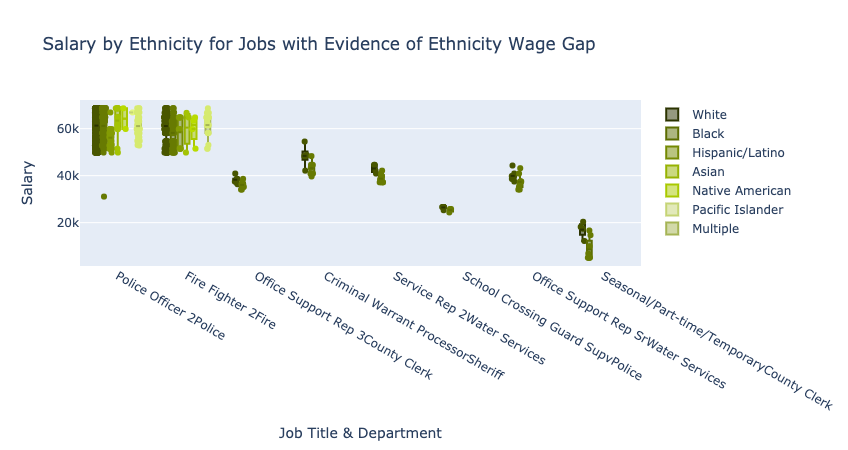

In [39]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='White',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#485600',
    line_color='#2b3300'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Black',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#677a02',
    line_color='#5c6d01'

))
fig.add_trace(go.Box(
    y=y3,
    x=x3,
    name='Hispanic/Latino',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#849c03',
    line_color='#748902'

))
fig.add_trace(go.Box(
    y=y4,
    x=x4,
    name='Asian',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#a4c304',
    line_color='#96b202'

))
fig.add_trace(go.Box(
    y=y5,
    x=x5,
    name='Native American',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#b8db00',
    line_color='#a9c900'

))
fig.add_trace(go.Box(
    y=y6,
    x=x6,
    name='Pacific Islander',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#e3f67d',
    line_color='#c5d475'

))
fig.add_trace(go.Box(
    y=y7,
    x=x7,
    name='Multiple',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#d6ea6f',
    line_color='#a5b454'

))
fig.add_trace(go.Box(
    y=y8,
    x=x8,
    name='Unreported',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#f0f2e5',
    line_color='#d4d6c7'

))
fig.update_layout(
    yaxis_title='Salary',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Salary by Ethnicity for Jobs with Evidence of Ethnicity Wage Gap",
    xaxis_title='Job Title & Department'
)
fig.show()
fig.write_image("RaceWageGap.pdf")

In [40]:
#run a post-hoc Dunn test with bonferroni on salary by ethnicity for those departments with evidence of a race wage gap
depts_e = metro_df2_e.groupby('NewTitle')
#depts.describe() 
for title in metro_df2_e.NewTitle.unique():
    if depts_e.get_group(title).Tenure.count() >= 3:
        #if any(depts_e.get_group(title).Gender == 'M') & any(depts_e.get_group(title).Gender == 'F'):
            #if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                phdunn_result = sp.posthoc_dunn(depts_e.get_group(title), val_col = 'Salary', group_col = 'Ethnicity', p_adjust = 'bonferroni')
                print (title, phdunn_result, "\n")

Police Officer 2Police                      Asian     Black  Hispanic/Latino  Multiple  \
Asian            -1.000000  1.000000         0.006363  1.000000   
Black             1.000000 -1.000000         0.008549  1.000000   
Hispanic/Latino   0.006363  0.008549        -1.000000  0.111919   
Multiple          1.000000  1.000000         0.111919 -1.000000   
Native American   1.000000  1.000000         1.000000  1.000000   
Pacific Islander  1.000000  1.000000         1.000000  1.000000   
White             1.000000  1.000000         0.005142  1.000000   

                  Native American  Pacific Islander     White  
Asian                         1.0               1.0  1.000000  
Black                         1.0               1.0  1.000000  
Hispanic/Latino               1.0               1.0  0.005142  
Multiple                      1.0               1.0  1.000000  
Native American              -1.0               1.0  1.000000  
Pacific Islander              1.0              -1.0  1.0

#### For Salary by Ethnicity - These are the significant differences:
    Police Officer 2Police - Hispanic/Latino & Asian
                           - Hispanic/Latino & Black
                           - Hispanic/Latino & White
    Fire Fighter 2Fire - Black & White
    Office Support Rep SrWater Services - Black & White
    Office Support Rep 3County Clerk - Black & White
    Service Rep 2Water Services - Black & White
    Criminal Warrant ProcessorSheriff - Black & White
    Seasonal/Part-time/TemporaryCounty Clerk - Black & White
    School Crossing Guard SupvPolice - Black & White

### Question: Is there a significant difference in tenure between people of diff gender?

#### Examining tenure by gender for metro employees overall

In [41]:
#running a two-sided mann-whitney-u on tenure by gender for all of metro
#then doing a post hoc test with a bonferroni correction for multiple comparisons
results_gender_t = stats.mannwhitneyu(metro_df2.query('Gender == "M"').Tenure, metro_df2.query('Gender == "F"').Tenure, use_continuity=True, alternative='two-sided')
results_gt_adj = sp.posthoc_mannwhitney(metro_df2, val_col = 'Tenure', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
print(results_gt_adj, "\n")

# getting the median salaries and then taking the difference, 
#    for a ballpark on how much more metro gives to men than women each year
print(metro_df2.query('Gender == "M"').Tenure.median()) #9
print(metro_df2.query('Gender =="F"').Tenure.median()) #6
print(metro_df2.query('Gender == "M"').Tenure.mean()) #12.174068402246045
print(metro_df2.query('Gender =="F"').Tenure.mean()) #10.146681234635345

              F             M
F -1.000000e+00  1.012371e-29
M  1.012371e-29 -1.000000e+00 

9.0
6.0
12.174068402246045
10.146681234635345


In [48]:
#gender came out as significant so we're going to plot the salaries
y1 = metro_df2.query('Gender=="M"').Tenure
y2 = metro_df2.query('Gender=="F"').Tenure

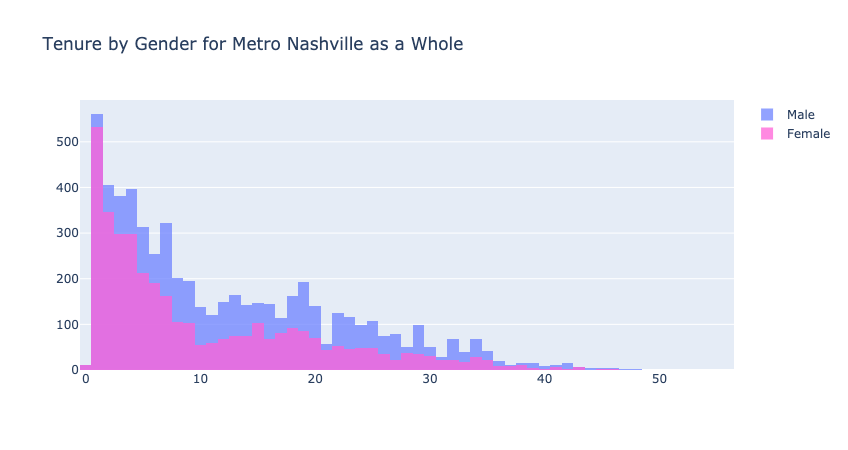

In [49]:
#add a trace for male and female, overlay the histograms with some transparency
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = y1,
    name='Male',
    marker_color='#6e83ff'
))
fig.add_trace(go.Histogram(
    x=y2,
    name='Female',
    marker_color='#ff61d7'
))
fig.update_layout(barmode='overlay',
    title_text="Tenure by Gender for Metro Nashville as a Whole")
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("TenureWageGap_Overall.pdf")

#### Examining tenure by gender for each department

In [24]:
##Investigate the spread of tenure by gender now
depts1 = metro_df2.groupby('Dept')
for dept in metro_df2.Dept.unique():
    if depts1.get_group(dept).Tenure.count() >= 3:
        if any(depts1.get_group(dept).Gender == 'M') & any(depts1.get_group(dept).Gender == 'F'):
            k1 = depts1.get_group(dept).query('Gender == "M"').Tenure
            k2 = depts1.get_group(dept).query('Gender == "F"').Tenure
            if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                #print (title, k1.mean(), k2.mean())
                results_gender_td = stats.mannwhitneyu(depts1.get_group(dept).query('Gender == "M"').Tenure, depts1.get_group(dept).query('Gender == "F"').Tenure, use_continuity=True, alternative='two-sided')
                results_gtd_adj = sp.posthoc_mannwhitney(depts1.get_group(dept), val_col = 'Tenure', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
                if results_gender_td.pvalue < 0.05:
                    print(dept, results_gtd_adj, "\n")

Police           F         M
F -1.000000  0.000018
M  0.000018 -1.000000 

Fire           F         M
F -1.000000  0.000112
M  0.000112 -1.000000 

Historical Commission           F         M
F -1.000000  0.049588
M  0.049588 -1.000000 

Parks           F         M
F -1.000000  0.000009
M  0.000009 -1.000000 

Trustee           F         M
F -1.000000  0.039474
M  0.039474 -1.000000 



In [32]:
#Titles where there's a gender gap in tenure:
tenure_gap_d = ['Police', 'Fire', 'Historical Commission', 'Parks', 'Trustee']

metro_df2_td = metro_df2[metro_df2.Dept.isin(tenure_gap_d)]

In [33]:
#setting up variables for boxplot examining salary by gender for each job title
y1 = metro_df2_td.query('Gender=="M"').Tenure
y2 = metro_df2_td.query('Gender=="F"').Tenure
x1 = metro_df2_td.query('Gender=="M"').Dept
x2 = metro_df2_td.query('Gender=="F"').Dept
x1

0       Police
1       Police
3       Police
4       Police
5         Fire
         ...  
9523    Police
9527      Fire
9528    Police
9532     Parks
9536    Police
Name: Dept, Length: 2994, dtype: object

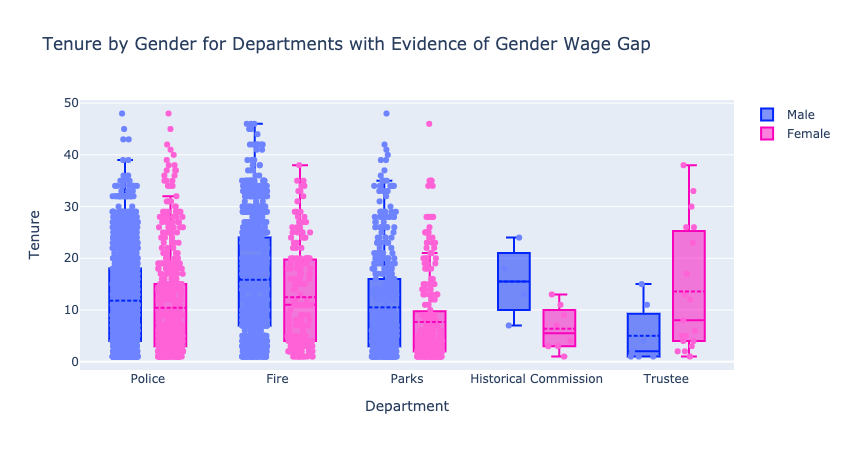

In [34]:
#add traces for male and female, group the different boxes by traces for job title
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Tenure',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Tenure by Gender for Departments with Evidence of Gender Wage Gap",
    xaxis_title='Department'
)
fig.show()
fig.write_image("GenderTenureGap_Dept.pdf")

#### Examining tenure by gender for each job title

In [42]:
##Investigate the spread of tenure by gender now
for title in metro_df2.NewTitle.unique():
    if depts.get_group(title).Tenure.count() >= 3:
        if any(depts.get_group(title).Gender == 'M') & any(depts.get_group(title).Gender == 'F'):
           # print(title)
            k1 = depts.get_group(title).query('Gender == "M"').Tenure
            k2 = depts.get_group(title).query('Gender == "F"').Tenure
            if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                #print (title, k1.mean(), k2.mean())
                results_gender_t = stats.mannwhitneyu(depts.get_group(title).query('Gender == "M"').Tenure, depts.get_group(title).query('Gender == "F"').Tenure, use_continuity=True, alternative='two-sided')
                results_gt_adj = sp.posthoc_mannwhitney(depts.get_group(title), val_col = 'Tenure', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
                if results_gender_t.pvalue < 0.05:
                    print(title, results_gt_adj, "\n")

Police Officer 2Police           F         M
F -1.000000  0.000272
M  0.000272 -1.000000 

Fire CaptainFire           F         M
F -1.000000  0.014124
M  0.014124 -1.000000 

Fire Fighter 2Fire          F        M
F -1.00000  0.03279
M  0.03279 -1.00000 

Technical Specialist 2Police           F         M
F -1.000000  0.026271
M  0.026271 -1.000000 

Public Health Nurse 1Health           F         M
F -1.000000  0.048714
M  0.048714 -1.000000 

Judicial Asst 1State Trial Courts           F         M
F -1.000000  0.005397
M  0.005397 -1.000000 

Police CaptainPolice          F        M
F -1.00000  0.04895
M  0.04895 -1.00000 

Fire Fighter/ParamedicFire           F         M
F -1.000000  0.011298
M  0.011298 -1.000000 

Correctional Officer 2Sheriff           F         M
F -1.000000  0.003278
M  0.003278 -1.000000 

Seasonal/Part-time/TemporaryHealth           F         M
F -1.000000  0.033364
M  0.033364 -1.000000 

Inmate Prop Clerk-DCSOSheriff           F         M
F -1.000000  0.00

In [39]:
#Titles where there's a gender gap in tenure:
tenure_gap = ['Police Officer 2Police', 'Fire CaptainFire', 'Fire Fighter 2Fire', 'Technical Specialist 2Police',
'Public Health Nurse 1Health', 'Judicial Asst 1State Trial Courts', 'Police CaptainPolice', 
'Fire Fighter/ParamedicFire', 'Correctional Officer 2Sheriff', 'Seasonal/Part-time/TemporaryHealth',
'Inmate Prop Clerk-DCSOSheriff', 'Crime Lab Forensic Scientist 2Police']

metro_df2_t = metro_df2[metro_df2.NewTitle.isin(tenure_gap)]

In [40]:
#setting up variables for boxplot examining salary by gender for each job title
y1 = metro_df2_t.query('Gender=="M"').Tenure
y2 = metro_df2_t.query('Gender=="F"').Tenure
x1 = metro_df2_t.query('Gender=="M"').NewTitle
x2 = metro_df2_t.query('Gender=="F"').NewTitle
x1

1       Police Officer 2Police
5             Fire CaptainFire
6             Fire CaptainFire
8       Police Officer 2Police
9           Fire Fighter 2Fire
                 ...          
9519    Police Officer 2Police
9521    Police Officer 2Police
9522        Fire Fighter 2Fire
9527        Fire Fighter 2Fire
9536    Police Officer 2Police
Name: NewTitle, Length: 1540, dtype: object

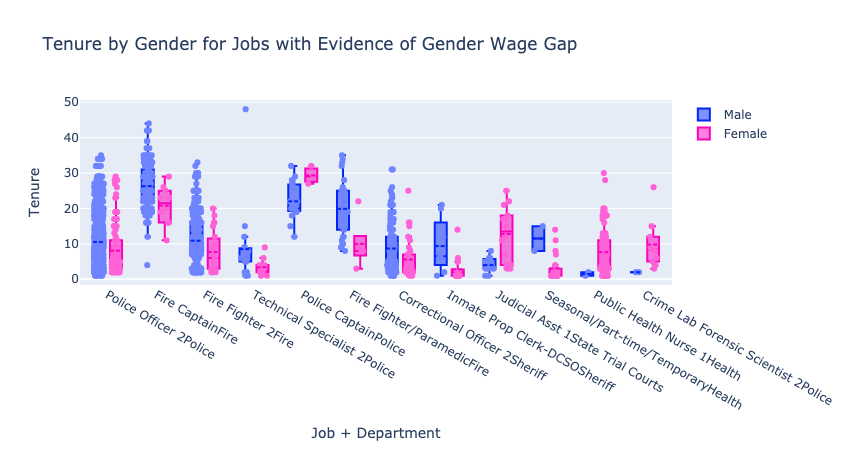

In [41]:
#add traces for male and female, group the different boxes by traces for job title
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Tenure',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Tenure by Gender for Jobs with Evidence of Gender Wage Gap",
    xaxis_title='Job + Department'
)
fig.show()
fig.write_image("GenderTenureGap_Jobs.pdf")

#### For Tenure by Gender - These are the significant differences:
     Police Officer 2Police 
     Fire CaptainFire 
     Fire Fighter 2Fire
     Technical Specialist 2Police
     Public Health Nurse 1Health 
     Fire Fighter/ParamedicFire 
     Correctional Officer 2Sheriff 
     Seasonal/Part-time/TemporaryHealth
     Inmate Prop Clerk-DCSOSheriff 
     Crime Lab Forensic Scientist 2Police 

### Question: Is there a significant difference in tenure between people of diff ethnicity?

#### Examining tenure by ethnicity for metro employees overall

In [44]:
#running a kruskal wallis test for tenure by ethnicity, with a post hoc dunn_test and bonferroni correction
results_ethnicity_t = stats.kruskal(metro_df2.query('Ethnicity == "White"').Tenure, metro_df2.query('Ethnicity == "Black"').Tenure, metro_df2.query('Ethnicity == "Asian"').Tenure, metro_df2.query('Ethnicity == "Native American"').Tenure, metro_df2.query('Ethnicity == "Pacific Islander"').Tenure, metro_df2.query('Ethnicity == "Multiple"').Tenure, metro_df2.query('Ethnicity == "Unreported"').Tenure, metro_df2.query('Ethnicity == "Hispanic/Latino"').Tenure, nan_policy = 'omit')
phdunn_result_t = sp.posthoc_dunn(metro_df2, val_col = 'Tenure', group_col = 'Ethnicity', p_adjust = 'bonferroni')
print(results_ethnicity_t) #
print(phdunn_result_t)

#Differences in median tenures between races that have significant differences in tenure for all of metro
#Black / Hispanic Latino - 1 to 2 years
#White / Black - 2 to 3 years
#Multiple / Hispanic Latino - 3 years
#White / Hispanic Latino - 4 years
print(metro_df2.query('Ethnicity == "Multiple"').Tenure.median()) #8
print(metro_df2.query('Ethnicity == "White"').Tenure.median()) #9
print(metro_df2.query('Ethnicity == "Black"').Tenure.median()) #6
print(metro_df2.query('Ethnicity == "Hispanic/Latino"').Tenure.median()) #5
print(metro_df2.query('Ethnicity == "Multiple"').Tenure.mean()) #11.43157894736842
print(metro_df2.query('Ethnicity == "White"').Tenure.mean()) #12.029379244984995
print(metro_df2.query('Ethnicity == "Black"').Tenure.mean()) #10.277482941622441
print(metro_df2.query('Ethnicity == "Hispanic/Latino"').Tenure.mean()) #7.9653846153846155

KruskalResult(statistic=119.01994249722647, pvalue=1.2256390270873919e-22)
                  Asian         Black  Hispanic/Latino  Multiple  \
Asian              -1.0  1.000000e+00     1.000000e+00  1.000000   
Black               1.0 -1.000000e+00     2.576479e-03  0.117978   
Hispanic/Latino     1.0  2.576479e-03    -1.000000e+00  0.000025   
Multiple            1.0  1.179783e-01     2.477827e-05 -1.000000   
Native American     1.0  1.000000e+00     9.617896e-01  1.000000   
Pacific Islander    1.0  1.000000e+00     1.000000e+00  1.000000   
Unreported          1.0  1.000000e+00     1.000000e+00  1.000000   
White               1.0  3.044597e-16     2.365039e-11  1.000000   

                  Native American  Pacific Islander  Unreported         White  
Asian                     1.00000               1.0         1.0  1.000000e+00  
Black                     1.00000               1.0         1.0  3.044597e-16  
Hispanic/Latino           0.96179               1.0         1.0  2.36503

In [50]:
#plotting these differences
x1 = metro_df2.query('Ethnicity == "White"').Tenure
x2 = metro_df2.query('Ethnicity == "Black"').Tenure
x3 = metro_df2.query('Ethnicity == "Hispanic/Latino"').Tenure
x4 = metro_df2.query('Ethnicity == "Native American"').Tenure
x5 = metro_df2.query('Ethnicity == "Pacific Islander"').Tenure
x6 = metro_df2.query('Ethnicity == "Asian"').Tenure
x7 = metro_df2.query('Ethnicity == "Multiple"').Tenure
x8 = metro_df2.query('Ethnicity == "Unreported"').Tenure


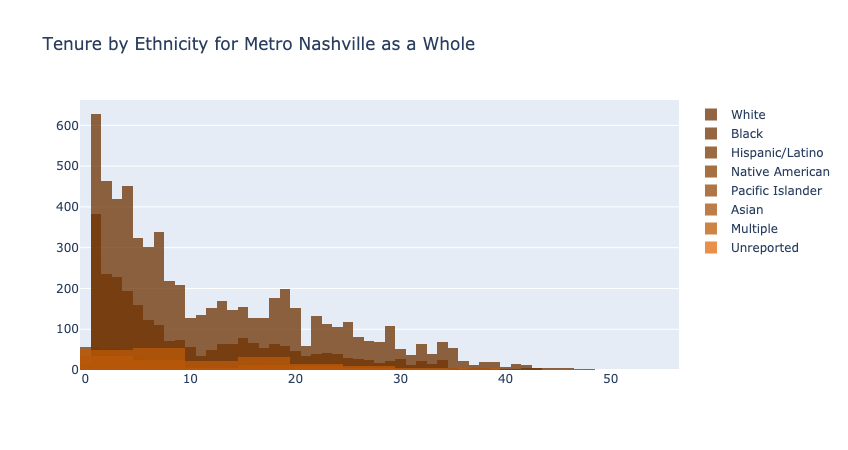

In [51]:
#comment out each race until you need to use it for a comparison
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = x1,
    name='White',
    marker_color='#6b3102'
))
fig.add_trace(go.Histogram(
    x=x2,
    name='Black',
    marker_color='#703301'
))
fig.add_trace(go.Histogram(
    x=x3,
    name='Hispanic/Latino',
    marker_color='#7a3801'
))
fig.add_trace(go.Histogram(
    x=x4,
    name='Native American',
    marker_color='#8a4003'
))
fig.add_trace(go.Histogram(
    x=x5,
    name='Pacific Islander',
    marker_color='#964706'
))
fig.add_trace(go.Histogram(
    x=x6,
    name='Asian',
    marker_color='#a85108'
))
fig.add_trace(go.Histogram(
    x=x7,
    name='Multiple',
    marker_color='#bd5a08'
))
fig.add_trace(go.Histogram(
    x=x8,
    name='Unreported',
    marker_color='#e06b09'
))
fig.update_layout(barmode='overlay',
    title_text="Tenure by Ethnicity for Metro Nashville as a Whole")
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("EthnicityTenureGap_Overall.pdf")

#### Now let's examine tenure gap by ethnicity for each department

In [59]:
#run a MWU or KW on the salaries by ethnicity for each job title
for dept in metro_df2.Dept.unique():
    if depts1.get_group(dept).Tenure.count() >= 3:
        if depts1.get_group(dept).Ethnicity.nunique() >= 2:
            e_list = depts1.get_group(dept).Ethnicity.unique()
            #print(e_list[1])
            #print(title, depts.get_group(title).Ethnicity.nunique())
            k1 = depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure
            k2 = depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure
            if len(e_list) == 2:
                #print(title)
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.mannwhitneyu(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, use_continuity=True, alternative='two-sided')
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 3:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 4:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 5:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 6:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 7:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[6]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 8:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[6]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[7]').Tenure, nan_policy = 'omit')
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")

            

Police KruskalResult(statistic=25.226561774749797, pvalue=0.00030999486046235844) 

Sheriff KruskalResult(statistic=19.710306524377085, pvalue=0.0014161919161335254) 

Fire KruskalResult(statistic=23.056333497083227, pvalue=0.00032929706897699815) 

Water Services KruskalResult(statistic=15.870308354928628, pvalue=0.007224271013567021) 

Public Defender KruskalResult(statistic=12.751358611098825, pvalue=0.012556820456739724) 

Metro Action Commission KruskalResult(statistic=19.376369386767912, pvalue=0.00022852930035968381) 

Health KruskalResult(statistic=16.52900139190604, pvalue=0.002385585411770241) 

General Sessions Court KruskalResult(statistic=12.071099794822759, pvalue=0.007143529042262231) 

Juvenile Court KruskalResult(statistic=14.355589938590743, pvalue=0.0007633491961668825) 

Criminal Court Clerk KruskalResult(statistic=10.111188768792395, pvalue=0.038595798793491724) 

State Fair Board KruskalResult(statistic=6.203534769880343, pvalue=0.044969653429208424) 

County Cler

In [60]:
## Now I want to look at the raw data in box plots for those specific departments with evidence of ethnicity-based wage gap
#Titles where there's a ethnicity gap in salary:
racetenure_gapdept = ['Police',
'Sheriff',
'Fire',
'Water Services',
'Public Defender',
'Metro Action Commission',
'Health ',
'General Sessions Court',
'Juvenile Court ',
'Criminal Court Clerk',
'State Fair Board ',
'County Clerk ',
'Clerk and Master']
metro_df2_et = metro_df2[metro_df2.Dept.isin(racetenure_gapdept)]
##plot tenure gender gaps and make sure they are in the same direction as the salary difference
#update - they do all go in the same direction as the salary difference
y1 = metro_df2_et.query('Ethnicity=="White"').Tenure
y2 = metro_df2_et.query('Ethnicity=="Black"').Tenure
y3 = metro_df2_et.query('Ethnicity=="Hispanic/Latino"').Tenure
y4 = metro_df2_et.query('Ethnicity=="Asian"').Tenure
y5 = metro_df2_et.query('Ethnicity=="Native American"').Tenure
y6 = metro_df2_et.query('Ethnicity=="Pacific Islander"').Tenure
y7 = metro_df2_et.query('Ethnicity=="Multiple"').Tenure
y8 = metro_df2_et.query('Ethnicity=="Unreported"').Tenure
x1 = metro_df2_et.query('Ethnicity=="White"').Dept
x2 = metro_df2_et.query('Ethnicity=="Black"').Dept
x3 = metro_df2_et.query('Ethnicity=="Hispanic/Latino"').Dept
x4 = metro_df2_et.query('Ethnicity=="Asian"').Dept
x5 = metro_df2_et.query('Ethnicity=="Native American"').Dept
x6 = metro_df2_et.query('Ethnicity=="Pacific Islander"').Dept
x7 = metro_df2_et.query('Ethnicity=="Multiple"').Dept
x8 = metro_df2_et.query('Ethnicity=="Unreported"').Dept
x1

0        Police
1        Police
3        Police
5          Fire
6          Fire
         ...   
9529       Fire
9530       Fire
9535    Sheriff
9536     Police
9537     Police
Name: Dept, Length: 3749, dtype: object

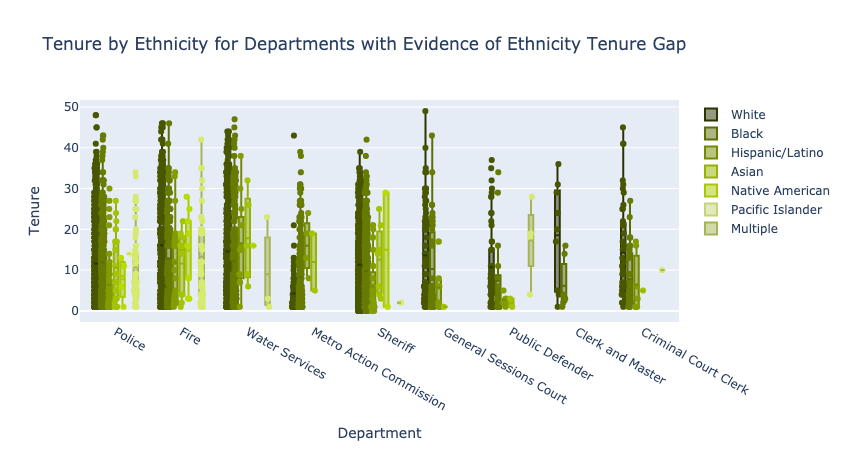

In [61]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='White',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#485600',
    line_color='#2b3300'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Black',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#677a02',
    line_color='#5c6d01'

))
fig.add_trace(go.Box(
    y=y3,
    x=x3,
    name='Hispanic/Latino',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#849c03',
    line_color='#748902'

))
fig.add_trace(go.Box(
    y=y4,
    x=x4,
    name='Asian',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#a4c304',
    line_color='#96b202'

))
fig.add_trace(go.Box(
    y=y5,
    x=x5,
    name='Native American',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#b8db00',
    line_color='#a9c900'

))
fig.add_trace(go.Box(
    y=y6,
    x=x6,
    name='Pacific Islander',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#e3f67d',
    line_color='#c5d475'

))
fig.add_trace(go.Box(
    y=y7,
    x=x7,
    name='Multiple',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#d6ea6f',
    line_color='#a5b454'

))
fig.add_trace(go.Box(
    y=y8,
    x=x8,
    name='Unreported',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#f0f2e5',
    line_color='#d4d6c7'

))
fig.update_layout(
    yaxis_title='Tenure',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Tenure by Ethnicity for Departments with Evidence of Ethnicity Tenure Gap",
    xaxis_title='Department'
)
fig.show()
fig.write_image("RaceTenureGapDept.pdf")

In [58]:
#run a post-hoc Dunn test with bonferroni on salary by ethnicity for those departments with evidence of a race wage gap
depts_ed = metro_df2_ed.groupby('Dept')
#depts.describe() 
for dept in metro_df2_ed.Dept.unique():
    if depts_ed.get_group(dept).Salary.count() >= 3:
        #if any(depts_e.get_group(title).Gender == 'M') & any(depts_e.get_group(title).Gender == 'F'):
            #if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                phdunn_result = sp.posthoc_dunn(depts_ed.get_group(dept), val_col = 'Salary', group_col = 'Ethnicity', p_adjust = 'bonferroni')
                print (dept, phdunn_result, "\n")

Police                      Asian         Black  Hispanic/Latino  Multiple  \
Asian            -1.000000  3.165174e-02         0.194530  1.000000   
Black             0.031652 -1.000000e+00         1.000000  0.000504   
Hispanic/Latino   0.194530  1.000000e+00        -1.000000  0.067687   
Multiple          1.000000  5.042475e-04         0.067687 -1.000000   
Native American   1.000000  1.000000e+00         1.000000  1.000000   
Pacific Islander  1.000000  1.000000e+00         1.000000  1.000000   
White             1.000000  1.993196e-21         0.001339  1.000000   

                  Native American  Pacific Islander         White  
Asian                         1.0               1.0  1.000000e+00  
Black                         1.0               1.0  1.993196e-21  
Hispanic/Latino               1.0               1.0  1.338601e-03  
Multiple                      1.0               1.0  1.000000e+00  
Native American              -1.0               1.0  1.000000e+00  
Pacific Islander

#### Now let's examine tenure gap by ethnicity for each job title

In [45]:
#Now lets examine the tenure gap by ethnicity
tenure_e_gap = []
for title in metro_df2.NewTitle.unique():
    if depts.get_group(title).Tenure.count() >= 3:
        if depts.get_group(title).Tenure.nunique() >= 2:
            e_list = depts.get_group(title).Ethnicity.unique()
            if depts.get_group(title).Ethnicity.nunique() > 1:
                if len(e_list) == 2:
                    results_tenure = stats.mannwhitneyu(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, use_continuity=True, alternative='two-sided')
                    if results_tenure.pvalue < 0.05:
                        print(title, results_tenure, "\n")
                        tenure_e_gap.append(title)
                elif len(e_list) == 3:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 4:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 5:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[4]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 6:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[4]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[5]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 7:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[4]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[5]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[6]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 8:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[4]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[5]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[6]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[7]').Tenure, nan_policy = 'omit') 
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)


Police Officer 2Police KruskalResult(statistic=13.508583514371066, pvalue=0.03563411236770066) 

Fire CaptainFire KruskalResult(statistic=19.1759334498822, pvalue=0.0007257909129609241) 

Fire Fighter 2Fire KruskalResult(statistic=16.140830365777, pvalue=0.006453289979230304) 

Teacher AsstMetro Action Commission KruskalResult(statistic=6.350198478192232, pvalue=0.04178995668160321) 

Fire EngineerFire KruskalResult(statistic=17.65031317696659, pvalue=0.0034181488905402316) 

Police Officer TraineePolice KruskalResult(statistic=11.499999999999693, pvalue=0.0093077971060977) 

Office Support Spec 2Water Services MannwhitneyuResult(statistic=216.0, pvalue=0.028472822603083824) 

Office Support Rep SrWater Services MannwhitneyuResult(statistic=14.5, pvalue=0.025866013991407037) 

Utility Maintenance Tech SrWater Services MannwhitneyuResult(statistic=11.0, pvalue=0.02078569644465714) 

Seasonal/Part-time/TemporaryHealth KruskalResult(statistic=7.601305164148106, pvalue=0.022356177853879604

In [46]:
#Titles where there's an ethnicity gap in wage
racewage_gap
#Titles where there's a ethnicity gap in tenure:
tenure_e_gap 

metro_df2_te = metro_df2[metro_df2.NewTitle.isin(tenure_e_gap)]

In [47]:
##plot tenure ethnicity gaps and make sure they are in the same direction as the salary difference
#update - there is no overlap between the ethnicity wage gap titles and the ethnicity tenure gap titles
y1 = metro_df2_te.query('Ethnicity=="White"').Tenure
y2 = metro_df2_te.query('Ethnicity=="Black"').Tenure
y3 = metro_df2_te.query('Ethnicity=="Hispanic/Latino"').Tenure
y4 = metro_df2_te.query('Ethnicity=="Asian"').Tenure
y5 = metro_df2_te.query('Ethnicity=="Native American"').Tenure
y6 = metro_df2_te.query('Ethnicity=="Pacific Islander"').Tenure
y7 = metro_df2_te.query('Ethnicity=="Multiple"').Tenure
y8 = metro_df2_te.query('Ethnicity=="Unreported"').Tenure
x1 = metro_df2_te.query('Ethnicity=="White"').NewTitle
x2 = metro_df2_te.query('Ethnicity=="Black"').NewTitle
x3 = metro_df2_te.query('Ethnicity=="Hispanic/Latino"').NewTitle
x4 = metro_df2_te.query('Ethnicity=="Asian"').NewTitle
x5 = metro_df2_te.query('Ethnicity=="Native American"').NewTitle
x6 = metro_df2_te.query('Ethnicity=="Pacific Islander"').NewTitle
x7 = metro_df2_te.query('Ethnicity=="Multiple"').NewTitle
x8 = metro_df2_te.query('Ethnicity=="Unreported"').NewTitle
y1

1        6
5       23
6       25
8        4
9        2
        ..
9519     5
9521    11
9527    19
9536     5
9537     3
Name: Tenure, Length: 1445, dtype: int64

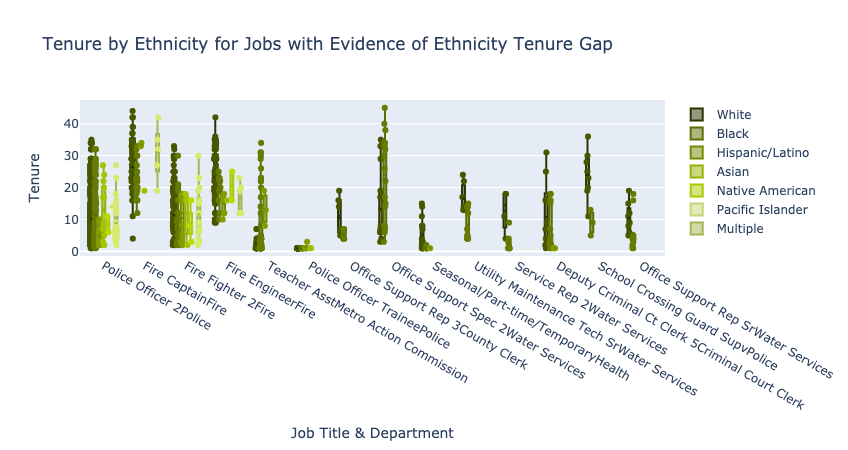

In [48]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='White',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#485600',
    line_color='#2b3300'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Black',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#677a02',
    line_color='#5c6d01'

))
fig.add_trace(go.Box(
    y=y3,
    x=x3,
    name='Hispanic/Latino',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#849c03',
    line_color='#748902'

))
fig.add_trace(go.Box(
    y=y4,
    x=x4,
    name='Asian',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#a4c304',
    line_color='#96b202'

))
fig.add_trace(go.Box(
    y=y5,
    x=x5,
    name='Native American',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#b8db00',
    line_color='#a9c900'

))
fig.add_trace(go.Box(
    y=y6,
    x=x6,
    name='Pacific Islander',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#e3f67d',
    line_color='#c5d475'

))
fig.add_trace(go.Box(
    y=y7,
    x=x7,
    name='Multiple',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#d6ea6f',
    line_color='#a5b454'

))
fig.add_trace(go.Box(
    y=y8,
    x=x8,
    name='Unreported',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#f0f2e5',
    line_color='#d4d6c7'

))
fig.update_layout(
    yaxis_title='Tenure',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Tenure by Ethnicity for Jobs with Evidence of Ethnicity Tenure Gap",
    xaxis_title='Job Title & Department'
)
fig.show()
fig.write_image("RaceTenureGap.pdf")

#### For Tenure by Ethnicity - These are the significant differences:
    Police Officer 2Police  - Hispanic/Latino & Asian
                         - Hispanic/Latino & Black
                         - Hispanic/Latino & White
    Fire CaptainFire  - Black & White
    Fire Fighter 2Fire - Black & White
    Fire EngineerFire  - Hispanic/Latino & White
    Police Officer TraineePolice - Black & Hispanic/Latino
                                 - White & Hispanic/Latino
    Office Support Spec 2Water Services - Black & White
    Office Support Rep SrWater Services - Black & White
    Utility Maintenance Tech SrWater Services - Black & White
    Seasonal/Part-time/TemporaryHealth - Black & White
    Office Support Rep 3County Clerk - Black & White
    Deputy Criminal Ct Clerk 5Criminal Court Clerk - Hispanic/Latino & White
    Service Rep 2Water Services - Black & White
    School Crossing Guard SupvPolice - Black & White




Sanity check for what I've done thus far, and have I done post hoc with bonferroni:
    Salary by Gender - all of metro #yes & sig, men make ~ $10,176.03 more
                     - by job title #yes & several sig
    Salary by Ethnicity - all of metro #yes & several sig
                        - by job title #yes & several sig
    Tenure by Gender - all of metro
                     - by job title #yes & several sig
    Tenure by Ethnicity - all of metro
                        - by job title #yes & several sig


## Question: Have there been changes in employment or compensation since 2015?
     To do this I need to read in the old datasets for metro nashville and for the population demographics, when possible. 
     I need to pair them / make a calculation between them somehow. 
     Then I can look at a stacked line graph of employment demographics (gender, then ethnicity) across the years. Use Friedman's test (non parametric for repeated measures ANOVA)
     Next I can look at stacked line graph of employment demographics compensation (gender, then ethnicity) across the years. Use Friedman's test (non parametric for repeated measures ANOVA)

## Question: Are elected officials more diverse than non-elected officials?
     To do this I need to make a new column for elected vs non-elected.
     Then group by that column. 
     Plot a stacked bar graph (% employees by demographic) for elected vs non elected.

## Question: Are the salary disparities greater if we leave out mandated salaries, unions, and elected positions?
    To do this I need to make a column for mandated salaries, union member, and elected position, as well as a fourth column for belonging to any of the aforementioned three columns. 
    Then examine Salary by Ethnicity for Criminal Warrant ProcessorSheriff, and Seasonal/Part-time/TemporaryCounty Clerk.
    Then examine Salary by Gender for Assistant Public Defennder 2Public Defender, Security Officer 1Sheriff, Emer Telecommunications Off 4Emergency Communications, Program Spec 2 Health, Procurement Officer 2Finance

## Question: Are people with similar age and tenure reaching different ranks based on demographics? 
    To do this I need to group by departments. 
    Then I need to identify jobs with same title but different "rank" (like officer 1, 2, 3). 
    Then make box plots for tenure (y) by title (x) for different demographics (race = sep boxes, then gender = sep boxes).

For each department
    print department, unique title
            dept, unique title,
            
            dept 2, unique title,
            dept 2, unique title, 
            
            etc
            

# Extras

In [40]:
y1 = metro_df2.query('Gender=="M"').Tenure
y2 = metro_df2.query('Gender=="F"').Tenure
x1 = metro_df2.query('Gender=="M"').Ethnicity
x2 = metro_df2.query('Gender=="F"').Ethnicity
x1

0       White
1       White
2       Black
3       White
4       Black
        ...  
9528    Asian
9532    Black
9534    White
9535    White
9536    White
Name: Ethnicity, Length: 5877, dtype: object

In [41]:
#WORKS BUT INCORRECT
#xm = ['White'] * (metro_df2.query('InterSn=="WhiteM"').Gender.count()) + ['Black'] * (metro_df2.query('InterSn=="BlackM"').Gender.count()) + ['Hispanic/Latino'] * (metro_df2.query('InterSn=="Hispanic/LatinoM"').Gender.count()) + ['Asian'] * (metro_df2.query('InterSn=="AsianM"').Gender.count()) + ['Native American'] * (metro_df2.query('InterSn=="Native AmericanM"').Gender.count()) + ['Pacific Islander'] * (metro_df2.query('InterSn=="Pacific IslanderM"').Gender.count()) + ['Unreported'] * (metro_df2.query('InterSn=="UnreportedM"').Gender.count())
#xf = ['White'] * (metro_df2.query('InterSn=="WhiteF"').Gender.count()) + ['Black'] * (metro_df2.query('InterSn=="BlackF"').Gender.count()) + ['Hispanic/Latino'] * (metro_df2.query('InterSn=="Hispanic/LatinoF"').Gender.count()) + ['Asian'] * (metro_df2.query('InterSn=="AsianF"').Gender.count()) + ['Native American'] * (metro_df2.query('InterSn=="Native AmericanF"').Gender.count()) + ['Pacific Islander'] * (metro_df2.query('InterSn=="Pacific IslanderF"').Gender.count()) + ['Unreported'] * (metro_df2.query('InterSn=="UnreportedF"').Gender.count())
#len(xm)      


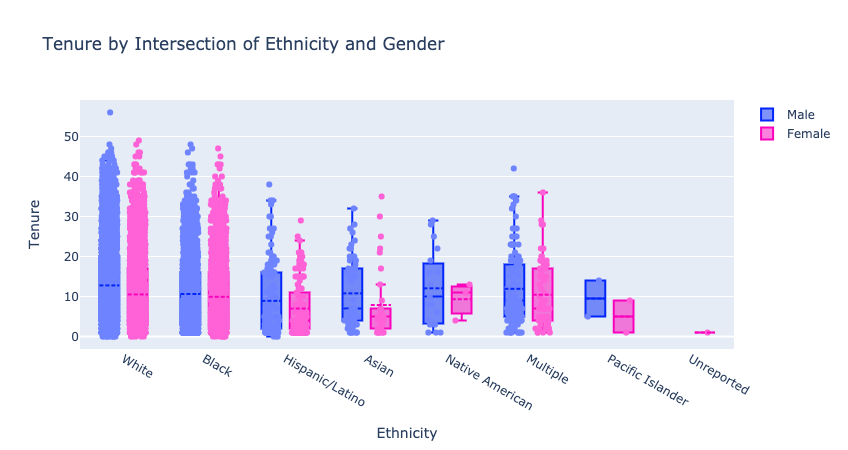

In [42]:
#fig = px.box(metro_df2, x="Ethnicity", y="Tenure", color="Gender")
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Tenure',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Tenure by Intersection of Ethnicity and Gender",
    xaxis_title='Ethnicity'
)
fig.show()

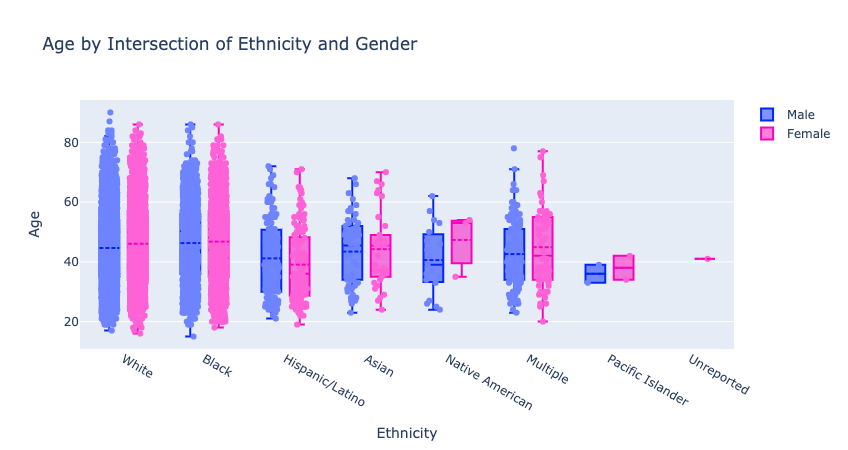

In [43]:
y3 = metro_df2.query('Gender=="M"').Age
y4 = metro_df2.query('Gender=="F"').Age
#fig = px.box(metro_df2, x="Ethnicity", y="Tenure", color="Gender")
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig = go.Figure()
fig.add_trace(go.Box(
    y=y3,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y4,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Age',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Age by Intersection of Ethnicity and Gender",
    xaxis_title='Ethnicity'
)
fig.show()

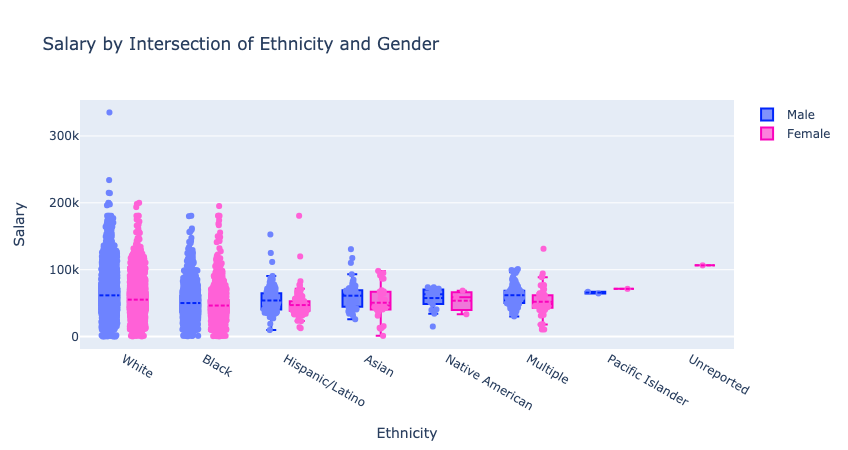

In [44]:
y5 = metro_df2.query('Gender=="M"').Salary
y6 = metro_df2.query('Gender=="F"').Salary
#fig = px.box(metro_df2, x="Ethnicity", y="Tenure", color="Gender")
#fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig = go.Figure()
fig.add_trace(go.Box(
    y=y5,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y6,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Salary',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Salary by Intersection of Ethnicity and Gender",
    xaxis_title='Ethnicity'
)
fig.show()